# Exploring Simple Spiral Tip Kinematics
Tim Tyree<br>
5.26.2020

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from lib.printStatements import *
#TODO: switch/fix x,y labeling in spiral tip output

%load_ext autoreload
%autoreload 2

In [2]:
data_dir = f'Data/tip_log_circle6_at_time_3012.8.csv'
fig_patt = lambda s,png: f'Figures/tip_log_circle6_at_time_3012.8_{s}.{png}'
df = pd.read_csv(data_dir)
print(f"the number of nan/missing values{dict(df.isnull().sum())}")
df.head()

#rezero time
df['t'] = df['t'] - df.t.values[0]

the number of nan/missing values{'s': 0, 't': 0, 'x': 0, 'y': 0}


In [3]:
t_values = []; n_values = [];
x1_values = []; y1_values = [];
x2_values = []; y2_values = [];
for j in range(df.t.size):
    t = df.iloc[j].t
    t_values.append(t)
    y = df.iloc[j].x
    x = df.iloc[j].y
    
    n = x.replace('[','').replace(']','').count('.')
    n_values.append(n)

    x_v = [float(x) for x in x.replace('[','').replace(']','').split(', ')]
    y_v = [float(y) for y in y.replace('[','').replace(']','').split(', ')]
    x_v.sort()
    y_v.sort()
    x1, x2 = x_v
    y1, y2 = y_v
    
    x1_values.append(x1)
    y1_values.append(y1)
    x2_values.append(x2)
    y2_values.append(y2)

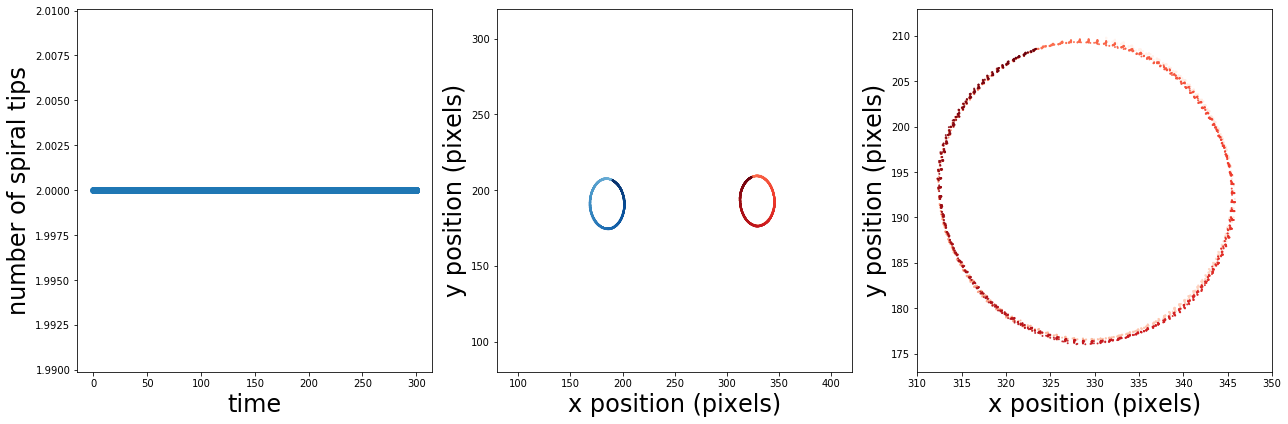

In [4]:
save = True
fontsize = 24
fig, axs = plt.subplots(1,3,figsize=(18,6))
ax = axs[0]
ax.scatter(x=t_values, y=n_values)
ax.set_xlabel('time', fontsize=24)
ax.set_ylabel('number of spiral tips', fontsize=fontsize)

ax = axs[1]
ax.scatter(x=x1_values, y=y1_values,c=t_values-t_values[0], s=1,cmap='Blues')
ax.scatter(x=x2_values, y=y2_values,c=t_values-t_values[0], s=1,cmap='Reds')
ax.set_xlabel('x position (pixels)', fontsize=fontsize)
ax.set_ylabel('y position (pixels)', fontsize=fontsize)
ax.axis([80,420, 80,320])

ax = axs[2]
# ax.scatter(x=x1_values, y=y1_values,c=t_values-t_values[0], s=1,cmap='Blues')
ax.scatter(x=x2_values, y=y2_values,c=t_values-t_values[0], s=1,cmap='Reds',alpha=0.8)
ax.set_xlabel('x position (pixels)', fontsize=fontsize)
ax.set_ylabel('y position (pixels)', fontsize=fontsize)
ax.axis([310,350, 173,213])
if save:
    plt.tight_layout()
    plt.savefig(fig_patt('fig1','png'))
else:
    plt.show()

# test for uniform circular motion by constant velocity
- constant velocity not numerically apparent at smallest time step of h=0.1
- how much time averaging yields constant velocity?

In [5]:
def plot_moving_average(f,navg,xfield='t',yfield='v'):
    ax.plot(f.rolling(navg).mean()[xfield].values, 
            f.rolling(navg).mean()[yfield].values, 
            label = f'navg={navg}', alpha=0.5)

#select one of the two tips and analyze it's motion
def tip_to_df(t_values,x_values,y_values):
    d = pd.DataFrame({'t':t_values,'x':x_values,'y':y_values})
    h=np.around(d['t'].diff().mean(),1)
    d['dx'] = d['x'].diff()/h
    d['dy'] = d['y'].diff()/h
    d['d2x'] = d['dx'].diff()/h
    d['d2y'] = d['dy'].diff()/h
    d['v'] = np.sqrt(d['dx']**2+d['dy']**2)
    d['a'] = np.sqrt(d['d2x']**2+d['d2y']**2)
    d = d.dropna().copy()
    print(f'time step is h={h}.')
    return d
d1 = tip_to_df(t_values,x1_values,y1_values)
d2 = tip_to_df(t_values,x2_values,y2_values)

time step is h=0.1.
time step is h=0.1.


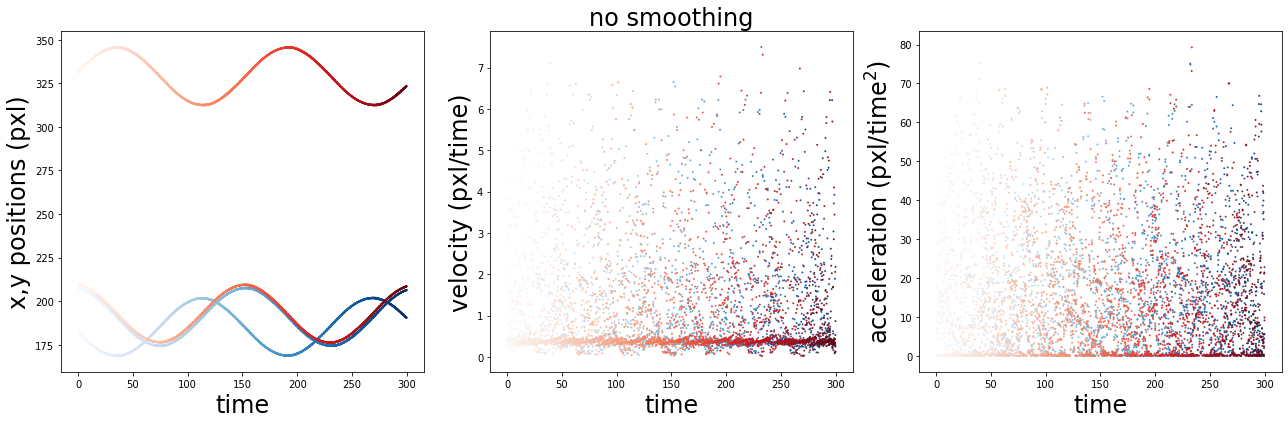

In [6]:
save = True
fig, axs = plt.subplots(1,3,figsize=(18,6))
tval = d1.t.values-t_values[0]
ax = axs[0]
ax.scatter(x=tval, y=d1.x.values,c=tval, s=1,cmap='Blues',alpha=0.8)
ax.scatter(x=tval, y=d1.y.values,c=tval, s=1,cmap='Blues',alpha=0.8)
ax.scatter(x=tval, y=d2.x.values,c=tval, s=1,cmap='Reds',alpha=0.8)
ax.scatter(x=tval, y=d2.y.values,c=tval, s=1,cmap='Reds',alpha=0.8)
ax.set_xlabel('time', fontsize=fontsize)
ax.set_ylabel('x,y positions (pxl)', fontsize=fontsize)

ax = axs[1]
ax.scatter(x=tval, y=d1.v.values,c=tval, s=1,cmap='Blues',alpha=0.8)
ax.scatter(x=tval, y=d2.v.values,c=tval, s=1,cmap='Reds',alpha=0.8)
ax.set_xlabel('time', fontsize=24)
ax.set_ylabel('velocity (pxl/time)', fontsize=fontsize)
ax.set_title('no smoothing', fontsize=fontsize)

ax = axs[2]
ax.scatter(x=tval, y=d1.a.values,c=tval, s=1,cmap='Blues',alpha=0.8)
ax.scatter(x=tval, y=d2.a.values,c=tval, s=1,cmap='Reds',alpha=0.8)
ax.set_xlabel('time', fontsize=fontsize)
ax.set_ylabel('acceleration (pxl/time$^2$)', fontsize=fontsize)
if save:
    plt.tight_layout()
    plt.savefig(fig_patt('fig2','png'))
else:
    plt.show()

## how much time averaging of velocity is needed for a smooth velocity?
- how much time averaging yields constant velocity?  it loos like $n_{avg}\approx10$ is the smallest window that makes the right period apparent in the velocity trace.
- we also observe

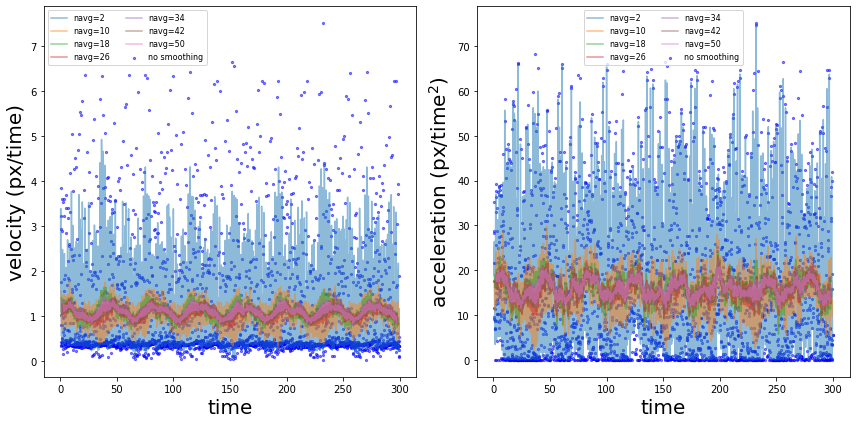

In [7]:
save = True
imin = 1#40
imax = -1#140
fontsize = 20
f = d1.iloc[imin:imax].copy()
# t_values = f.t.values
fig, axs = plt.subplots(1,2,figsize=(12,6))
ax = axs[0]
ax.scatter(x=f.t.values, y=f.v.values, label = 'no smoothing', c='blue',s=5, alpha = .5)
for navg in range(2,51,8):
    plot_moving_average(f,navg=navg,xfield='t',yfield='v')
ax.set_xlabel('time', fontsize=fontsize)
ax.set_ylabel('velocity (px/time)', fontsize=fontsize)
ax.legend(fontsize = fontsize-12, ncol=2)

ax = axs[1]
ax.scatter(x=f.t.values, y=f.a.values, label = 'no smoothing', c='blue',s=5, alpha = .5)
for navg in range(2,51,8):
    plot_moving_average(f,navg=navg,xfield='t',yfield='a')
ax.set_xlabel('time', fontsize=fontsize)
ax.set_ylabel('acceleration (px/time$^2$)', fontsize=fontsize)
ax.legend(fontsize = fontsize-12, ncol=2)
if save:
    plt.tight_layout()
    plt.savefig(fig_patt('fig3','png'))
else:
    plt.show()

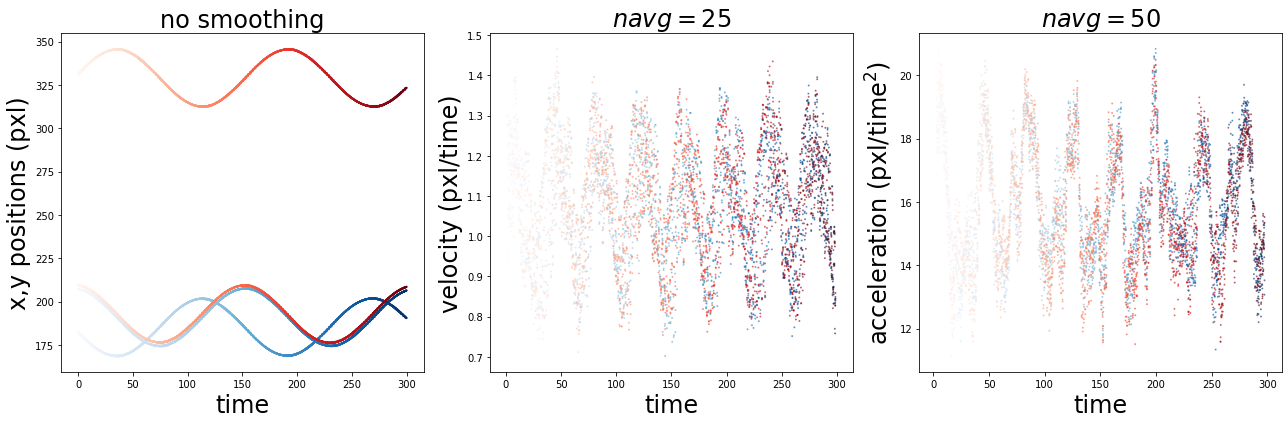

In [8]:
save = True
fig, axs = plt.subplots(1,3,figsize=(18,6))
tval = d1.t.values-t_values[0]
ax = axs[0]
ax.scatter(x=tval, y=d1.x.values,c=tval, s=1,cmap='Blues',alpha=0.8)
ax.scatter(x=tval, y=d1.y.values,c=tval, s=1,cmap='Blues',alpha=0.8)
ax.scatter(x=tval, y=d2.x.values,c=tval, s=1,cmap='Reds',alpha=0.8)
ax.scatter(x=tval, y=d2.y.values,c=tval, s=1,cmap='Reds',alpha=0.8)
ax.set_xlabel('time', fontsize=24)
ax.set_ylabel('x,y positions (pxl)', fontsize=24)
ax.set_title(f'no smoothing', fontsize=24)

ax = axs[1]
navg = 25
xfield='t'; yfield='v';
ax.scatter(d1.rolling(navg).mean()[xfield].values, 
    d1.rolling(navg).mean()[yfield].values, alpha=0.5, c=tval, s=1,cmap='Blues')
ax.scatter(d2.rolling(navg).mean()[xfield].values, 
    d2.rolling(navg).mean()[yfield].values, alpha=0.5, c=tval, s=1,cmap='Reds')       
ax.set_xlabel('time', fontsize=24)
ax.set_ylabel('velocity (pxl/time)', fontsize=24)
ax.set_title(f'$navg={navg}$', fontsize=24)

ax = axs[2]
navg = 50
xfield='t'; yfield='a';
ax.scatter(d1.rolling(navg).mean()[xfield].values, 
    d1.rolling(navg).mean()[yfield].values, alpha=0.5, c=tval, s=1,cmap='Blues')
ax.scatter(d2.rolling(navg).mean()[xfield].values, 
    d2.rolling(navg).mean()[yfield].values, alpha=0.5, c=tval, s=1,cmap='Reds')       
ax.set_xlabel('time', fontsize=24)
ax.set_ylabel('acceleration (pxl/time$^2$)', fontsize=24)
ax.set_title(f'$navg={navg}$', fontsize=24)
if save:
    plt.tight_layout()
    plt.savefig(fig_patt('fig4','png'))
else:
    plt.show()

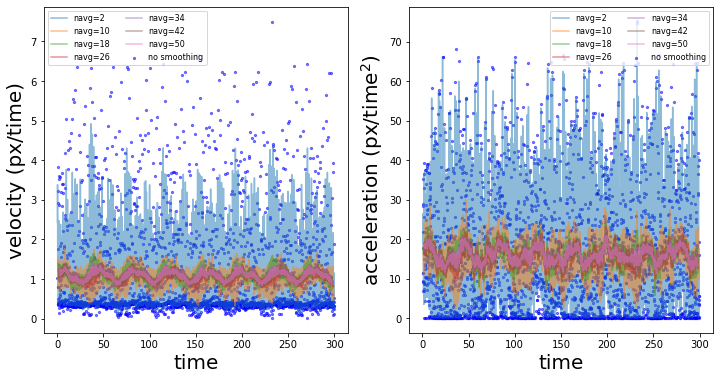

In [9]:
#TODO: print the mean time averaged velocity and acceleration from taking moving averages
save = False
imin = 1#40
imax = -1#140
fontsize = 20
f = d1.iloc[imin:imax].copy()
# t_values = f.t.values
fig, axs = plt.subplots(1,2,figsize=(12,6))
ax = axs[0]
ax.scatter(x=f.t.values, y=f.v.values, label = 'no smoothing', c='blue',s=5, alpha = .5)
for navg in range(2,51,8):
    plot_moving_average(f,navg=navg,xfield='t',yfield='v')
ax.set_xlabel('time', fontsize=fontsize)
ax.set_ylabel('velocity (px/time)', fontsize=fontsize)
ax.legend(fontsize = fontsize-12, ncol=2)

ax = axs[1]
ax.scatter(x=f.t.values, y=f.a.values, label = 'no smoothing', c='blue',s=5, alpha = .5)
for navg in range(2,51,8):
    plot_moving_average(f,navg=navg,xfield='t',yfield='a')
ax.set_xlabel('time', fontsize=fontsize)
ax.set_ylabel('acceleration (px/time$^2$)', fontsize=fontsize)
ax.legend(fontsize = fontsize-12, ncol=2)
if save:
    plt.tight_layout()
    plt.savefig(fig_patt('fig5','png'))
else:
    plt.show()

# estimate circle center as averaged moving averaged coordinate
- navg=1 seems to produce circle centers consistent with n=50

In [10]:
navg_list = np.arange(2,51,4)
x1_lst = []; y1_lst = [];
x2_lst = []; y2_lst = [];
v1_lst = []; a1_lst = [];
v2_lst = []; a2_lst = [];
for navg in navg_list:
    tmp1 = d1.rolling(navg).mean().describe().T['mean']
    tmp2 = d2.rolling(navg).mean().describe().T['mean']
    x1_lst.append(tmp1.x)
    x2_lst.append(tmp2.x)
    y1_lst.append(tmp1.y)
    y2_lst.append(tmp2.y)
    v1_lst.append(tmp1.v)
    v2_lst.append(tmp2.v)
    a1_lst.append(tmp1.a)
    a2_lst.append(tmp2.a)

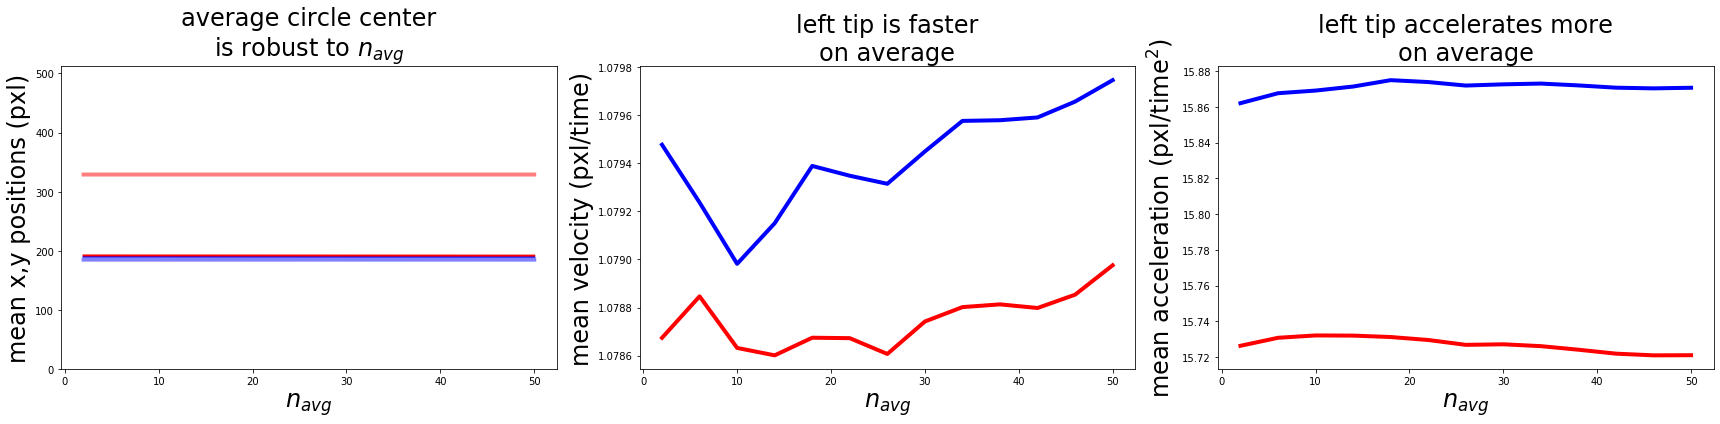

In [11]:
fontsize = 24
save = True
fig, axs = plt.subplots(1,3,figsize=(24,6))
ax = axs[0]
ax.plot(navg_list, x1_lst, c='blue', lw=4, alpha=0.5)
ax.plot(navg_list, y1_lst, c='blue', lw=2, alpha=1.0)
ax.plot(navg_list, x2_lst, c='red',  lw=4, alpha=0.5)
ax.plot(navg_list, y2_lst, c='red',  lw=2, alpha=1.0)
ax.set_ylim([0, 512])
ax.set_xlabel('$n_{avg}$', fontsize=fontsize)
ax.set_ylabel('mean x,y positions (pxl)', fontsize=fontsize)
ax.set_title('average circle center\nis robust to $n_{avg}$', fontsize=fontsize)

ax = axs[1]
ax.plot(navg_list, v1_lst, c='blue', lw=4)
ax.plot(navg_list, v2_lst, c='red' , lw=4)
# ax.set_ylim([0, 512])
ax.set_xlabel('$n_{avg}$', fontsize=fontsize)
ax.set_ylabel('mean velocity (pxl/time)', fontsize=fontsize)
ax.set_title('left tip is faster\non average', fontsize=fontsize)

ax = axs[2]
ax.plot(navg_list, a1_lst, c='blue', lw=4)
ax.plot(navg_list, a2_lst, c='red' , lw=4)
# ax.set_ylim([0, 512])
ax.set_xlabel('$n_{avg}$', fontsize=fontsize)
ax.set_ylabel('mean acceleration (pxl/time$^2$)', fontsize=fontsize)
ax.set_title('left tip accelerates more\non average', fontsize=fontsize)

if save:
    plt.tight_layout()
    plt.savefig(fig_patt('fig6','png'))
else:
    plt.show()

# estimate the angular velocity according uniform circular motion
- Spiral tip trajectory #1 (blue) has a slightly larger radius than spiral tip #2 (red).
    - this is consistent with their periods being constrained to match.
    - thus, __angular velocity__ matches between spiral tips
    - perhaps, __angular velocity__ is conserved by pair annihilation/production events


In [15]:
R1 = d1.x.describe()[['min','max']].diff()['max']/2
R2 = d2.x.describe()[['min','max']].diff()['max']/2
V1 = float(d1.v.describe()[['mean']])
V2 = float(d1.v.describe()[['mean']])
omega1 = V1**2/R1
omega2 = V2**2/R2
T1 = 2*np.pi/omega1
T2 = 2*np.pi/omega2

In [16]:
print_uniform_circ_motion(1,R1,V1,omega1,T1)
print_uniform_circ_motion(2,R2,V2,omega2,T2)

for tip trajectory #1:
    	radius of circular spiral  = 16.83 pixels,
    	average speed  = 1.08 pixels/time,
    	angular velocity  = 0.07 radians/time.
    	implies the period  = 90.75 time units.
    
for tip trajectory #2:
    	radius of circular spiral  = 16.77 pixels,
    	average speed  = 1.08 pixels/time,
    	angular velocity  = 0.07 radians/time.
    	implies the period  = 90.41 time units.
    


# TODO: first and forthmost, measure the period from peak to peak
- visually, it appears to be about T=50 time units

In [18]:
np.diff(x1_values)


scipy.signal.find_peaks(x, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)



array([ 0.00148284,  0.00140834, -0.0934877 , ..., -0.0413649 ,
        0.01257335, -0.2151474 ])

# TODO: Fit sinusoid to position curve using a fft
- TODO: use ^this fit to develop robust features that can be computed locally

In [14]:
#TODO: fit sinusoids to the position using a fft and subtracting the mean
#TODO: print 
#TODO: make a short time ft to extract local features that are consistent with ^those
#TODO: 